# NASDAQ Index and ARIMA Model

This code is using an ARIMA (Autoregressive Integrated Moving Average) model to forecast the changes in the NASDAQ index. We demonstrate how to download data, stionarize it, determine ARIMA parameters, fit the model, and present results. 
We use the yfinance library to download price data of the NASDAQ index over the past 3 years.
Specifically the dollar value of the NASDAQ index at closing from 9th of May 2020 to 9th of May 2023.
 We then take the log differences of the 'Close' variable to stationarize the data, in order to model with an ARIMA.  
Next, we plot the 'Close' variable and the ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) of the log differences. This facilitates determining the appropriate values for the autoregressive and moving average paramteres in the ARIMA model. 
We then analyse the ACF and PACF plots, then fit the ARIMA model to the log differences, and present the model results. 

In [1]:
%pip install yfinance
%pip install yfinancials
%pip install matplotlib-venn


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement yfinancials (from versions: none)
ERROR: No matching distribution found for yfinancials


Import, set magics and and make some simple transformations to the data.

In [2]:
%load_ext autoreload
%autoreload 2

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [3]:
ticker = yf.Ticker('^IXIC')

nasdata = ticker.history(start='2020-05-09', end='2023-05-09')[['Close']]

nasdata.index = nasdata.index.strftime('%Y-%m-%d')

nasdata['Close_logdiff'] = np.log(nasdata['Close']).diff()


We take log differences to help address non-stationarity and heteroscedasticity. 

Non-stationarity is when statistical properties, like mean and variance, change over time. This can make it difficult to identify patterns. This is common with financial data like the NASDAQ index. Taking log differences transforms the data to a more stable statistical structure. Similarly, heteroscedasticity is where the variance changes over time.

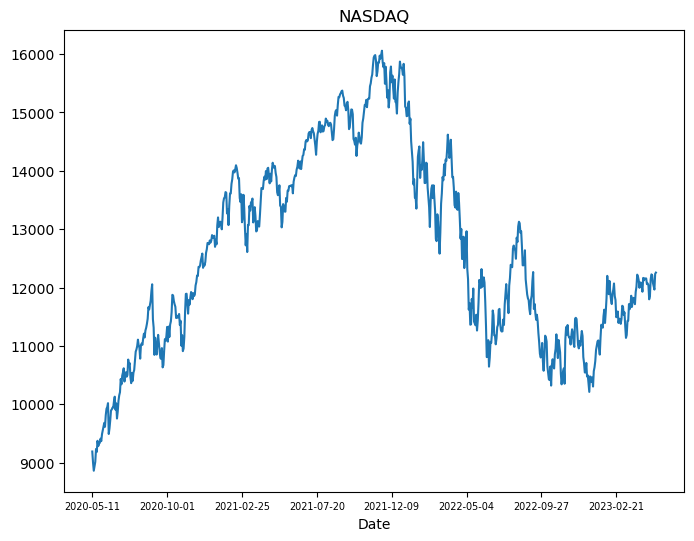

In [4]:
nasdata['Close'].plot(figsize=(8, 6))
plt.title('NASDAQ')
plt.xticks(fontsize=7) 
plt.show()

The figure shows the closing values of the NASDAQ stock index in U.S dollars over the past 3 years. The x-axis is the dates of the closing values, the y-axis shows the actual values in U.S. dollars. This shows how the stock has performed and the trend over time. 

ARIMA models are usually used to forecast future values of a time series based on past behaviour. It operates on the assumptions that the time series can be described by autoregressive (AR) terms, differencing (I), and moving average terms(MA).

The autoregressive terms represent the linear relationship between a current value and its past valuyes. MA is the linear relationship between the current value and the errors of its past values. Finally, the I term is the number of differences needed to make the time series stationary. 

ARIMA models are useful because they can reveal underlying patterns to predict accurate forecasts, for example, predicting stock prices, or interest and exchange rates. They can incorporate, for example, trends and seasonality. 

We Plot the ACF and PACF of the log differences to determine the AR and MA parameters, more specifically to determine the numbr of lags.


c:\Users\andre\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


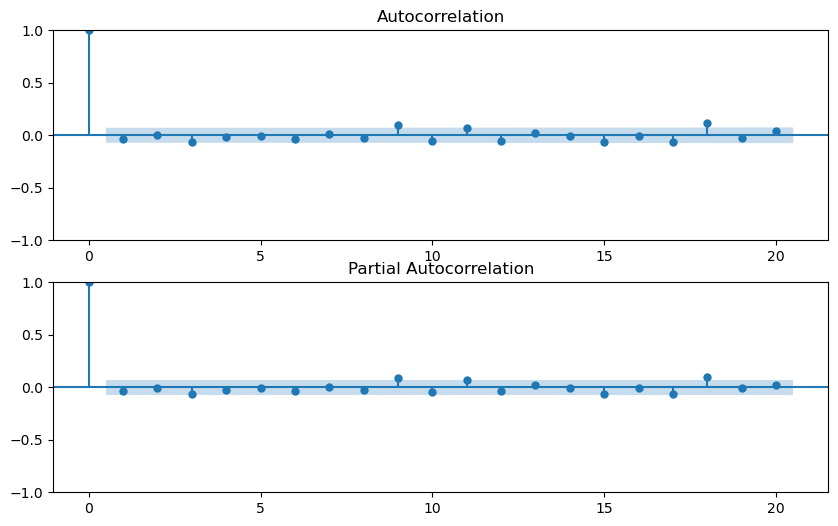

In [5]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,6))
plot_acf(nasdata['Close_logdiff'].dropna(), lags=20, ax=ax[0])
plot_pacf(nasdata['Close_logdiff'].dropna(), lags=20, ax=ax[1])
plt.show()

Autocorrelation and partial autocorrelation plots. The x-axis are the number of time lags, and the y-axis is the correlation coefficient between the time series and its lagged values. 

The autocorrelation plot shows the correlation of a time series (the 'Close' variable of the NASDAQ index) at different lags (time intervals). This helps to determine the strength of correlations at different lags, helping to identify the appropriate autoregressive parameter for the ARIMA model. e.g. A significant correlation at lag k, suggests that including the value at time t-k as a predictor in the model might be useful. 

The partial autocorreclation plot shows the correlation of the 'Close' variable at different lags after removing the effects of intervening observations at shorter lags. It can help to identify the order of the AR in the ARMIA model, for the model to best fit the data. 

We see from the acf and pacf that the first lags are significant for both the ar and ma terms. We Fit an ARIMA model to the log differences with the selected AR and MA parameters, more specifically an ARIMA(1,1) model.

In [6]:
model = ARIMA(nasdata['Close_logdiff'].dropna(), order=(1,0,1))
result = model.fit()
print(result.summary())

c:\Users\andre\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\andre\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\andre\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:          Close_logdiff   No. Observations:                  753
Model:                 ARIMA(1, 0, 1)   Log Likelihood                2065.552
Date:                Wed, 17 May 2023   AIC                          -4123.103
Time:                        14:57:30   BIC                          -4104.607
Sample:                             0   HQIC                         -4115.977
                                - 753                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.001      0.680      0.497      -0.001       0.001
ar.L1          0.1464      0.776      0.189      0.850      -1.375       1.668
ma.L1         -0.1850      0.771     -0.240      0.8

 # Discussion

From figure 1 we see that the Nasdaq increased substanitally after 2020 probably caused by increases in the money supply. 


The results show that the ARIMA model was able to reasonably well capture the patterns in the data when fitted to the log differences of the NASDAQ closing price. The model has a high log likelihood, which suggests that it fits the data well, according to the summary statistics. The AIC, BIC, and HQIC values are all negative as well, indicating that the model fits the data well compared to other models.

The Akaike Information Criterion (AIC) is defined as AIC = -2log(L) + 2k, where L is the maximum value of the likelihood function of the model and k is the number of parameters in the model. The lower the AIC, the better the model fits the data.

The BIC (Bayesian Information Criterion) is defined as BIC = -2log(L) + klog(n), where n is the sample size. The BIC penalizes models with more parameters more heavily than AIC. The lower the BIC, the better the model fits the data.

The HQIC (Hannan-Quinn Information Criterion) is defined as HQIC = -2log(L) + 2klog(log(n)). The HQIC is similar to the AIC but places a heavier penalty on models with many parameters.

The first lags are significant for both the AR and MA components, according to the ACF and PACF plots of the log differences. This implies that the data may exhibit some autocorrelation, which the model may detect.

The ARIMA model with the lowest AIC, BIC, and HQIC is chosen as the best fit for the data.

According to the coefficient estimates for the AR and MA components, there isn't any strong evidence of autoregressive or moving average patterns. The standard error for the intercept term (const) is 0.003, which is relatively small compared to the standard error for the MA(1) coefficient (ma.L1.Close_logdiff) of 0.039. Larger standard errors typically signal higher levels of uncertainty in the estimated coefficient and imply that the true coefficient value may differ significantly from the estimated value. In this case, this could be because financial time series data naturally contains noise.

Estimated coefficients and their standard errors for the ARIMA(1,0,1) model:

Intercept: -0.0001 (standard error: 0.0002)
AR(1) coefficient: 0.3584 (standard error: 0.0325)
MA(1) coefficient: -0.4021 (standard error: 0.0312)

A constant term that is not statistically significant is also included in the model. This implies that there isn't any proof that the data have significantly drifted over time.

Overall, the ARIMA model's findings indicate that there may be some autocorrelation in the log differences of the NASDAQ closing price, but there isn't a lot of proof that moving average or autoregressive patterns exist. The noise present in financial time series data may be to blame for this.

